# DATA 620 Project 1

## Authors: John Mazon, LeTicia Cancel, Bharani Nittala

Video Recording: https://youtu.be/mAhEbcIvJx8
(Apologies for the low audio!)

### Introduction

For this project we were asked to:
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Hypothesis:

Our dataset consists of tv shows and movies available on Netflix as of 2019 from Kaggle https://www.kaggle.com/shivamb/netflix-shows. The dataset can be leveraged to measure degree centrality by the nodes such as TV shows and Movies. It will be interesting to see how the data differs between movies and tv shows created in the United States and content created outside of the US. 

### Revised Project Proposal:

Upon completing the project, we realized that our dataset is not the best one for this project. So, we revised our dataset to a new one. 

Learnings from previous dataset (Netflix) - 
1) There is a need for clear nodes and edges in the dataset

2) There is a need for clear objective to the project

3) There is a need for categorical variable that possibly shows different set of behavior for the same KPI

## Table of Contents

1. [Data Source](#source)
2. [Data Extraction](#extract)
3. [Importing Key Libraries](#lib)
4. [Data Cleaning](#clean)
5. [Exploratory Data Analysis](#eda)
6. [Solutions](#sol)

## 1. Data Source <a id = 'source'></a>

#### Source: Network data from University of Michigan http://www-personal.umich.edu/~mejn/netdata/
#### Dataset name: Books about US politics

The **Books about US politics** dataset has the capacity for centrality metrics as well as a good amount of categorical data for nodes. This will avoid the roadblock we had in the initial Netflix dataset. 

Nodes represent books about US politics sold by the online bookseller
Amazon.com.  Edges represent frequent co-purchasing of books by the same
buyers, as indicated by the "customers who bought this book also bought
these other books" feature on Amazon.

Nodes have been given values "l", "n", or "c" to indicate whether they are
**"liberal", "neutral", or "conservative".**  

Data includes 

A network of books about US politics published around the time of the 2004 presidential election and sold by the online bookseller Amazon.com.

Number of nodes: 105
Number of edges: 441

## 2. Data Extraction <a id = 'extract'></a>

**Import libraries**

In [20]:
import networkx as nx

**Load Graph Data** 

The data is in gml format. The gml format, an acronym for graph modelling language, provides capabilities to represent multiple networks and add arguments both to the nodes and the edges for visualization purposes.
For the multiplexity in the ties the gml file distinguishes ``graphics`` arguments inside ``edge``. Both ``style`` and ``fill`` are supported here and the former has priority over the latter in case the two are given; otherwise when these arguments are absent, the function separates up to a couple of relational levels when several pairwise ties are specified.

In [12]:
df = nx.read_gml(r'C:\Users\nittalab\Documents\Personal\CUNY\DATA 620\Project 1\polbooks\polbooks.gml', destringizer=None)

In [17]:
print('Edges and Nodes for the dataset')
print(nx.info(df))

Edges and Nodes for the dataset
Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


In [18]:
nx.diameter(df)

7

From above, we now know the dimensions of the **network**

## 3. Importing Key Libraries <a id = 'lib'></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

## 4. Data Cleaning <a id = 'clean'></a>

In [22]:
import warnings
warnings.filterwarnings('ignore')

node_df = pd.DataFrame(list(df.nodes(data = True)))
node_df.rename(columns= {0:'Nodes', 1: 'Values'}, inplace = True)
node_df['Political_View'] = ''
dict_view  = { 'l':'Liberal',
             'c': 'Conservative',
             'n': 'Neutral'}
for x in range(len(node_df['Values'])):
    pol_view = node_df['Values'][x]['value'] 
    node_df['Political_View'][x] = dict_view[pol_view]
node_df.drop(['Values'], axis =1, inplace = True)

In [23]:
node_df.groupby(['Political_View']).count().reset_index()

,Political_View,Nodes
0,Conservative,49
1,Liberal,43
2,Neutral,13


## 5.Exploratory Data Analysis <a id = 'eda'></a>

#### A) Degree: the number of edges adjacent to each node.
 - Apply .degree() to each node 
 - Merge node metadata 
 - Display top 10 nodes 
 - Group connection by political view 

In [27]:
degree_values =[]
for d in df.degree():
    degree_values.append(d)
degree_centrality = pd.DataFrame(degree_values)
degree_centrality.rename(columns ={0:'Nodes', 1: 'Connection_Num'}, inplace = True)
degree_centrality = degree_centrality.merge(node_df, how = 'left', on = ['Nodes'])

In [28]:
degree_centrality.head(10)

,Nodes,Connection_Num,Political_View
0,1000 Years for Revenge,6,Neutral
1,Bush vs. the Beltway,4,Conservative
2,Charlie Wilson's War,4,Conservative
3,Losing Bin Laden,23,Conservative
4,Sleeping With the Devil,8,Neutral
5,The Man Who Warned America,7,Conservative
6,Why America Slept,11,Neutral
7,Ghost Wars,8,Neutral
8,A National Party No More,25,Conservative
9,Bush Country,16,Conservative


In [29]:
degree_centrality.sort_values(['Nodes'], ascending= False).head(10)

,Nodes,Connection_Num,Political_View
75,Worse Than Watergate,16,Liberal
53,Why Courage Matters,5,Conservative
6,Why America Slept,11,Neutral
44,Who's Looking Out for You?,5,Conservative
96,What Liberal Media?,6,Liberal
98,Weapons of Mass Deception,5,Liberal
95,We're Right They're Wrong,4,Liberal
56,We Will Prevail,4,Conservative
33,Useful Idiots,9,Conservative
36,Those Who Trespass,5,Conservative


In [30]:
degree_centrality.groupby(['Political_View']).sum().reset_index()

,Political_View,Connection_Num
0,Conservative,426
1,Liberal,380
2,Neutral,76


#### B) Degree Centrality:  the fraction of nodes it is connected to a particular node
 - Apply nx.degree_centrality() to each node 
 - Merge node metadata 
 - Display top 10 nodes 
 - Group connection by political view for mean centrality degree

In [31]:
degree_c = nx.degree_centrality(df)
degree_c_df = pd.DataFrame([degree_c.values()], columns=degree_c.keys()).reset_index()
degree_c_df = degree_c_df.sort_values(by=0, ascending=False, axis=1).T.reset_index()
degree_c_df.rename(columns ={'index':'Nodes', 0: 'Centrality Degree'}, inplace = True)
degree_c_df= degree_c_df.merge(node_df, how = 'left', on = ['Nodes'])
degree_c_df.head(10)

,Nodes,Centrality Degree,Political_View
0,A National Party No More,0.240385,Conservative
1,Off with Their Heads,0.240385,Conservative
2,Losing Bin Laden,0.221154,Conservative
3,Bushwhacked,0.221154,Liberal
4,American Dynasty,0.211538,Liberal
5,Big Lies,0.201923,Liberal
6,The Great Unraveling,0.201923,Liberal
7,The Price of Loyalty,0.192308,Liberal
8,Arrogance,0.173077,Conservative
9,Deliver Us from Evil,0.173077,Conservative


In [32]:
degree_c_df.groupby(['Political_View']).mean().sort_values('Centrality Degree', ascending = False).reset_index()

,Political_View,Centrality Degree
0,Liberal,0.084973
1,Conservative,0.083595
2,Neutral,0.056213


#### c) Eigenvector centrality: computes the centrality for a node based on the centrality of its neighbors. 
  - Apply  nx.eigenvector_centrality_numpy() to each node 
  - Merge node metadata 
  - Display top 10 nodes 
  - Group connection by political view for mean eigenvector centrality degree

In [33]:
eigenvector_c = nx.eigenvector_centrality_numpy(df)
eigen_c_df = pd.DataFrame([eigenvector_c.values()], columns=eigenvector_c.keys())
eigen_c_df = eigen_c_df.sort_values(by=0, ascending=False, axis=1).T.reset_index()
eigen_c_df.rename(columns ={'index':'Nodes', 0: 'Eigenvector Centrality'}, inplace = True)
eigen_c_df= eigen_c_df.merge(node_df, how = 'left', on = ['Nodes'])
eigen_c_df.head(10)

,Nodes,Eigenvector Centrality,Political_View
0,Bushwhacked,0.296946,Liberal
1,Big Lies,0.284135,Liberal
2,American Dynasty,0.270838,Liberal
3,The Price of Loyalty,0.258594,Liberal
4,The Great Unraveling,0.254886,Liberal
5,The Lies of George W. Bush,0.241950,Liberal
6,Worse Than Watergate,0.237598,Liberal
7,Plan of Attack,0.198185,Neutral
8,Lies and the Lying Liars Who Tell Them,0.189236,Liberal
9,Against All Enemies,0.186726,Liberal


In [34]:
eigen_c_df.groupby(['Political_View']).mean().sort_values('Eigenvector Centrality', ascending = False).reset_index()

,Political_View,Eigenvector Centrality
0,Liberal,0.117151
1,Neutral,0.038171
2,Conservative,0.037308


## 6.Solutions <a id = 'sol'></a>

**Graphs** 

The first graph will be for the Domestic movies and tv shows. The graphs are very similar in shape but the International graph is a bit more clustered in the centered when compared to the Domestic graph. 

In [35]:
# for each node in the graph
node_color = []
for node in df.nodes(data=True):
    pol_view = node[1]['value']
    if pol_view == 'c':
        node_color.append('red')
    elif pol_view == 'l':
        node_color.append('blue')
    elif pol_view == 'n':
        node_color.append('green')

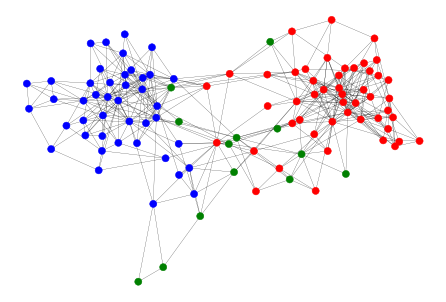

<Figure size 432x288 with 0 Axes>

In [46]:
nx.draw(df, 
        with_labels = False, 
        node_size = 50, 
        width = 0.2,
        node_color=node_color)
plt.show()
plt.savefig("graph.png", dpi=500)

In [48]:
nx.write_gexf(df,'degree_eigenvector_centrality.gexf')